In [ ]:
pip install pandas statsmodels matplotlib

In [11]:
import pandas as pd

# Load the dataset and set the frequency explicitly
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv"
data = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Set the frequency to daily
data = data.asfreq('D')

# Display the first few rows
print(data.head())

           geoid  cases  cases_avg  cases_avg_per_100k  deaths  deaths_avg  \
date                                                                         
2020-01-21   USA      1       0.14                 0.0       0         0.0   
2020-01-22   USA      0       0.14                 0.0       0         0.0   
2020-01-23   USA      0       0.14                 0.0       0         0.0   
2020-01-24   USA      1       0.29                 0.0       0         0.0   
2020-01-25   USA      1       0.43                 0.0       0         0.0   

            deaths_avg_per_100k  
date                             
2020-01-21                  0.0  
2020-01-22                  0.0  
2020-01-23                  0.0  
2020-01-24                  0.0  
2020-01-25                  0.0  


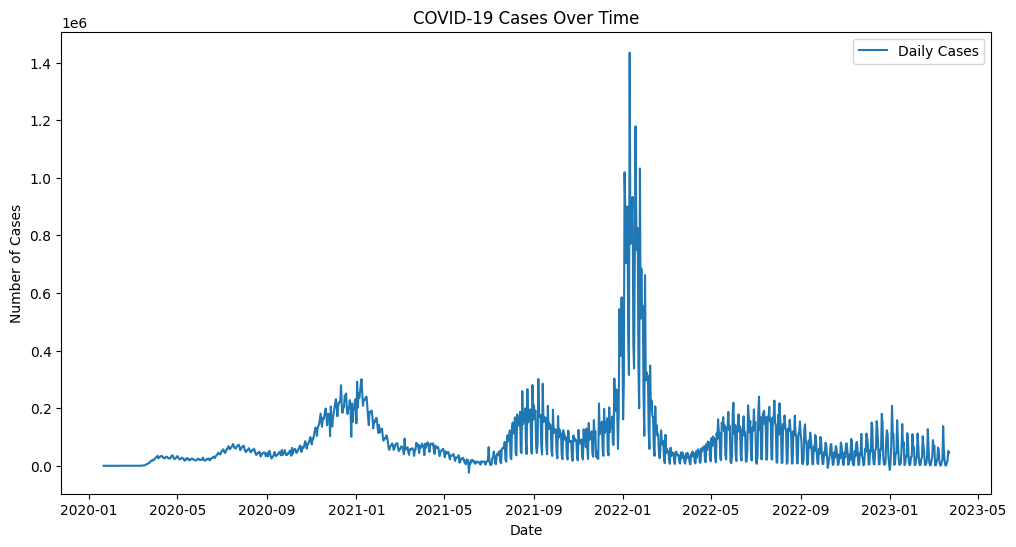

In [12]:
import matplotlib.pyplot as plt

# Plot the number of cases over time
plt.figure(figsize=(12, 6))
plt.plot(data['cases'], label='Daily Cases')
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

c:\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


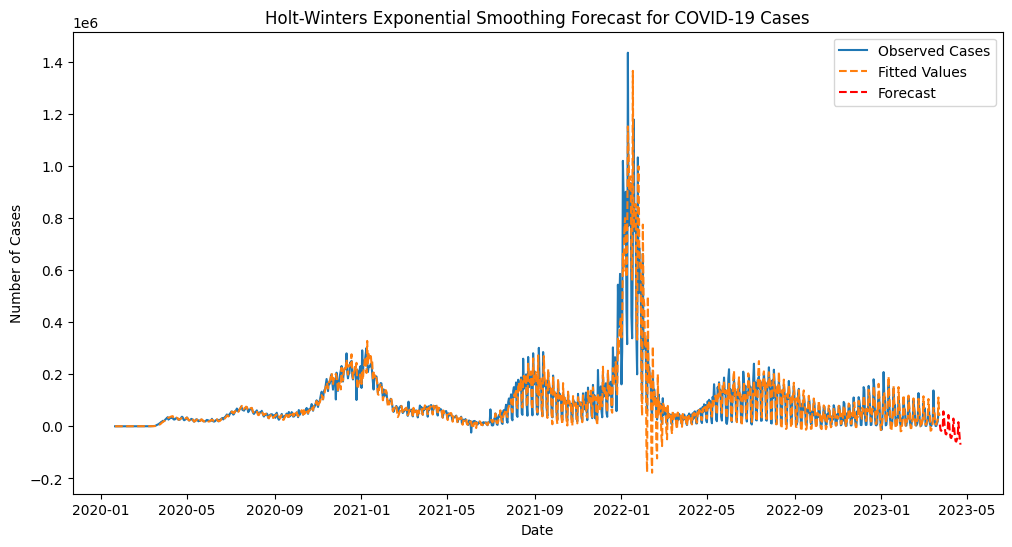

2023-03-24     6606.932527
2023-03-25   -15400.853742
2023-03-26   -17328.006124
2023-03-27    -8745.306598
2023-03-28    -1630.649660
2023-03-29    57248.390909
2023-03-30    27244.040995
2023-03-31    -7195.384948
2023-04-01   -29203.171217
2023-04-02   -31130.323599
2023-04-03   -22547.624073
2023-04-04   -15432.967135
2023-04-05    43446.073435
2023-04-06    13441.723521
2023-04-07   -20997.702423
2023-04-08   -43005.488691
2023-04-09   -44932.641074
2023-04-10   -36349.941548
2023-04-11   -29235.284610
2023-04-12    29643.755960
2023-04-13     -360.593954
2023-04-14   -34800.019897
2023-04-15   -56807.806166
2023-04-16   -58734.958548
2023-04-17   -50152.259022
2023-04-18   -43037.602085
2023-04-19    15841.438485
2023-04-20   -14162.911429
2023-04-21   -48602.337372
2023-04-22   -70610.123641
Freq: D, dtype: float64


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Apply Holt-Winters Exponential Smoothing with additive components
model = ExponentialSmoothing(data['cases'], 
                             seasonal='additive', 
                             trend='additive', 
                             seasonal_periods=7)  # Weekly seasonality
fit = model.fit()

# Forecasting
forecast = fit.forecast(steps=30)  # Forecast the next 30 days

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['cases'], label='Observed Cases')
plt.plot(fit.fittedvalues, label='Fitted Values', linestyle='--')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.title('Holt-Winters Exponential Smoothing Forecast for COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

# Print forecast values
print(forecast)